In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [ ]:
#importing files and sorting dataset
country_yield = pd.read_csv('yield.csv')
country_yield = country_yield.drop(['Domain Code','Domain','Area Code','Element Code','Element','Year Code','Item Code'], axis=1)
country_yield = country_yield.sort_values(by=['Area','Year','Item'])
country_yield.rename(columns={'Area':'country'}, inplace=True)
country_yield.columns = map(str.upper, country_yield.columns)
country_yield.head()

,COUNTRY,ITEM,YEAR,UNIT,VALUE
0,Afghanistan,Maize,1961,hg/ha,14000
56,Afghanistan,Potatoes,1961,hg/ha,86667
112,Afghanistan,"Rice, paddy",1961,hg/ha,15190
168,Afghanistan,Wheat,1961,hg/ha,10220
1,Afghanistan,Maize,1962,hg/ha,14000


In [ ]:
country_yield_1 = pd.read_csv('temp.csv')
country_yield_1

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN
...,...,...,...
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52


In [ ]:
#importing files and sorting dataset
country_temp = pd.read_csv('temp.csv')
country_temp = country_temp.sort_values(by=['country','year'])
country_temp.columns = map(str.upper, country_temp.columns)
country_temp

,YEAR,COUNTRY,AVG_TEMP
29523,1833,Afghanistan,13.91
29524,1834,Afghanistan,13.91
29525,1835,Afghanistan,14.71
29526,1836,Afghanistan,NaN
29527,1837,Afghanistan,15.47
...,...,...,...
24947,2009,Zimbabwe,20.52
24948,2010,Zimbabwe,21.17
24949,2011,Zimbabwe,20.78
24950,2012,Zimbabwe,20.52


In [ ]:
#cleaning up data
country_yield = country_yield.pivot_table(values='VALUE', index=(['COUNTRY','YEAR']), columns='ITEM')
country_yield.columns = map(str.upper, country_yield.columns)
country_yield


CASSAVA    MAIZE  PLANTAINS AND OTHERS  POTATOES  \
COUNTRY     YEAR                                                     
Afghanistan 1961      NaN  14000.0                   NaN   86667.0   
            1962      NaN  14000.0                   NaN   76667.0   
            1963      NaN  14260.0                   NaN   81333.0   
            1964      NaN  14257.0                   NaN   86000.0   
            1965      NaN  14400.0                   NaN   88000.0   
...                   ...      ...                   ...       ...   
Zimbabwe    2012  47010.0   7912.0                   NaN  171875.0   
            2013  46000.0   7449.0                   NaN  165714.0   
            2014  46445.0   9301.0                   NaN  167321.0   
            2015  46805.0   5803.0                   NaN  168515.0   
            2016  47086.0   6275.0                   NaN  169354.0   

                  RICE, PADDY  SORGHUM  SOYBEANS  SWEET POTATOES    WHEAT  \
COUNTRY     YEAR                                                            
Afghanistan 1961      15190.0      NaN       NaN             NaN  10220.0   
            1962      15190.0      NaN       NaN             NaN   9735.0   
            1963      15190.0      NaN       NaN             NaN   8317.0   
            1964      17273.0      NaN       NaN             NaN   9510.0   
            1965      17273.0      NaN       NaN             NaN   9723.0   
...                       ...      ...       ...             ...      ...   
Zimbabwe    2012      22581.0   2046.0   15300.0         22222.0  24420.0   
            2013      22581.0   3066.0   13142.0         22222.0  22888.0   
            2014      22651.0   4589.0   11767.0         22139.0  21357.0   
            2015      22766.0   2412.0    9459.0         22156.0  19826.0   
            2016      22828.0   2688.0   12727.0         22212.0  18294.0   

                  YAMS  
COUNTRY     YEAR        
Afghanistan 1961   NaN  
            1962   NaN  
            1963   NaN  
            1964   NaN  
            1965   NaN  
...                ...  
Zimbabwe    2012   NaN  
            2013   NaN  
            2014   NaN  
            2015   NaN  
            2016   NaN  

[10572 rows x 10 columns]

In [ ]:
#merging the dataframes
country_data = pd.merge(country_yield,country_temp,on=['COUNTRY','YEAR'])
country_data

,COUNTRY,YEAR,CASSAVA,MAIZE,PLANTAINS AND OTHERS,POTATOES,"RICE, PADDY",SORGHUM,SOYBEANS,SWEET POTATOES,WHEAT,YAMS,AVG_TEMP
0,Afghanistan,1961,NaN,14000.0,NaN,86667.0,15190.0,NaN,NaN,NaN,10220.0,NaN,14.23
1,Afghanistan,1962,NaN,14000.0,NaN,76667.0,15190.0,NaN,NaN,NaN,9735.0,NaN,14.10
2,Afghanistan,1963,NaN,14260.0,NaN,81333.0,15190.0,NaN,NaN,NaN,8317.0,NaN,15.01
3,Afghanistan,1964,NaN,14257.0,NaN,86000.0,17273.0,NaN,NaN,NaN,9510.0,NaN,13.73
4,Afghanistan,1965,NaN,14400.0,NaN,88000.0,17273.0,NaN,NaN,NaN,9723.0,NaN,13.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12762,Zimbabwe,2009,44708.0,4642.0,NaN,166136.0,22857.0,3230.0,15000.0,21854.0,30000.0,NaN,20.52
12763,Zimbabwe,2010,45152.0,8751.0,NaN,166825.0,22775.0,2702.0,13557.0,21905.0,27681.0,NaN,21.17
12764,Zimbabwe,2011,45589.0,6568.0,NaN,167336.0,22704.0,2267.0,12054.0,21953.0,26274.0,NaN,20.78
12765,Zimbabwe,2012,47010.0,7912.0,NaN,171875.0,22581.0,2046.0,15300.0,22222.0,24420.0,NaN,20.52


In [ ]:
country_data.dtypes

COUNTRY                  object
YEAR                      int64
CASSAVA                 float64
MAIZE                   float64
PLANTAINS AND OTHERS    float64
POTATOES                float64
RICE, PADDY             float64
SORGHUM                 float64
SOYBEANS                float64
SWEET POTATOES          float64
WHEAT                   float64
YAMS                    float64
AVG_TEMP                float64
dtype: object

In [ ]:
count = country_data['COUNTRY'].unique().size
count

118

In [ ]:
country_data.to_csv('country_data.csv')

In [ ]:
country_data['COUNTRY'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Canada', 'Central African Republic', 'Chile', 'China', 'Colombia',
       'Congo', 'Croatia', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Namibia',
       'Nepal', 'Netherlan

# COUNTRY TEMPERATURES

In [ ]:
country_temperatures = country_data.pivot_table(index='YEAR', columns='COUNTRY', values='AVG_TEMP')
country_temperatures

COUNTRY,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Zambia,Zimbabwe
YEAR,,,,,,,,,,,,,,,,,,,,,
1961,14.23,16.19,17.49,23.75,17.365,NaN,16.241667,8.95,NaN,25.08,...,19.01,14.640,23.18,NaN,NaN,9.300,16.82,NaN,20.77,20.52
1962,14.10,15.99,16.50,23.78,16.940,NaN,15.996667,7.48,NaN,24.74,...,18.48,15.538,23.06,NaN,NaN,8.122,16.04,NaN,20.51,20.47
1963,15.01,16.06,16.43,24.11,17.265,NaN,16.088333,7.46,NaN,24.73,...,18.52,14.952,23.03,NaN,NaN,7.940,16.47,NaN,20.14,19.81
1964,13.73,15.47,16.77,23.69,16.740,NaN,15.651667,7.86,NaN,25.14,...,18.59,13.944,22.98,NaN,NaN,8.928,15.72,NaN,20.36,20.12
1965,13.90,15.31,16.55,23.62,17.500,NaN,16.046667,7.27,NaN,24.92,...,18.45,14.284,23.21,NaN,NaN,8.352,16.56,NaN,20.25,19.93
1966,14.39,16.00,16.79,23.98,17.070,NaN,15.600000,8.82,NaN,24.53,...,18.67,15.738,23.37,NaN,NaN,8.820,16.07,NaN,20.96,20.42
1967,13.84,15.55,16.78,23.65,17.425,NaN,16.060000,8.87,NaN,24.95,...,18.65,13.942,23.20,NaN,NaN,9.078,16.71,NaN,20.49,20.17
1968,13.85,15.71,16.87,23.49,17.520,NaN,15.920000,8.34,NaN,24.40,...,18.67,14.598,22.93,NaN,NaN,8.780,16.65,NaN,20.53,20.53
1969,14.45,15.72,16.23,24.01,17.890,NaN,16.031667,7.80,NaN,24.81,...,18.22,14.648,23.39,NaN,NaN,8.700,16.81,NaN,20.56,20.40


In [ ]:
country_CASSAVA = country_data.pivot_table(index='YEAR', columns='COUNTRY', values='CASSAVA')
country_CASSAVA

COUNTRY,Angola,Argentina,Bahamas,Brazil,Burkina Faso,Burundi,Cameroon,Central African Republic,China,Colombia,...,Senegal,Sierra Leone,Singapore,Somalia,Sri Lanka,Suriname,Thailand,Uganda,Zambia,Zimbabwe
YEAR,,,,,,,,,,,,,,,,,,,,,
1961,35714.0,125810.0,83333.0,130732.0,60000.0,90244.0,53211.0,32727.0,124005.0,56522.0,...,39762.0,27618.0,125762.0,100000.0,76665.0,83094.0,173942.0,35331.0,62500.0,29286.0
1962,31875.0,121543.0,80645.0,134422.0,54000.0,90244.0,53097.0,31500.0,122354.0,56522.0,...,41207.0,27610.0,141832.0,100000.0,81993.0,85922.0,170575.0,39962.0,62500.0,30000.0
1963,32500.0,121185.0,84615.0,137523.0,52000.0,90244.0,52991.0,31000.0,114050.0,56338.0,...,45000.0,30129.0,136028.0,97059.0,63575.0,84940.0,151659.0,39860.0,63043.0,30000.0
1964,33000.0,115481.0,89552.0,141944.0,50000.0,90698.0,53018.0,30500.0,115720.0,56000.0,...,47273.0,29636.0,135618.0,100000.0,82027.0,76797.0,148777.0,41042.0,61304.0,30070.0
1965,33333.0,111282.0,92857.0,142818.0,52000.0,90698.0,54000.0,39000.0,125891.0,56338.0,...,39742.0,40000.0,127656.0,100000.0,62107.0,86276.0,145866.0,36212.0,63182.0,30070.0
1966,33333.0,115625.0,97222.0,138836.0,54000.0,90698.0,53982.0,24508.0,121338.0,59155.0,...,37551.0,41500.0,127865.0,100000.0,58932.0,63242.0,146712.0,41475.0,62069.0,30345.0
1967,33889.0,119134.0,100000.0,142434.0,60000.0,90909.0,54032.0,25877.0,125863.0,59028.0,...,37844.0,42105.0,127865.0,100000.0,53769.0,55000.0,147792.0,42016.0,61667.0,30345.0
1968,34333.0,110449.0,102564.0,146148.0,60000.0,90909.0,55003.0,26920.0,123542.0,58175.0,...,37147.0,40938.0,116667.0,100000.0,57923.0,55120.0,153950.0,40969.0,61667.0,30612.0
1969,35333.0,118815.0,106250.0,148193.0,60000.0,90909.0,55011.0,28042.0,119765.0,61290.0,...,45326.0,40642.0,112901.0,100000.0,58365.0,63909.0,163083.0,46667.0,61667.0,30000.0


In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)

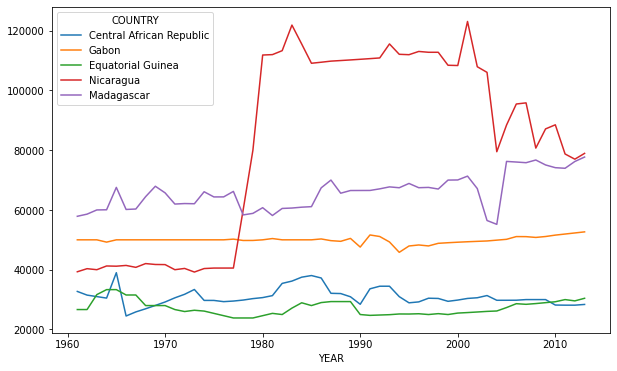

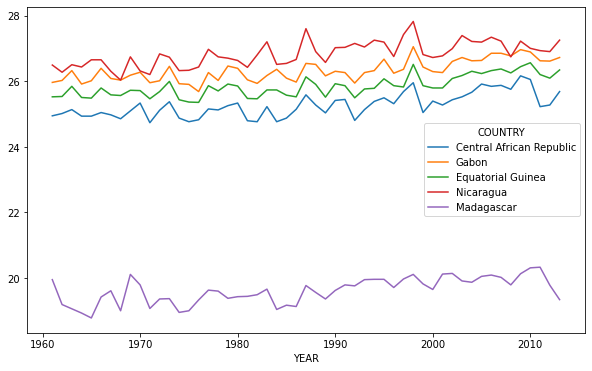

In [ ]:
country_CASSAVA_sample = country_CASSAVA.sample(n=5,axis='columns')
country_CASSAVA_TEMP_sample = country_CASSAVA_sample.columns.intersection(country_temperatures.columns)
country_CASSAVA_TEMP_sample = country_temperatures[country_CASSAVA_TEMP_sample]
country_CASSAVA_sample.plot(kind='line')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
country_CASSAVA_TEMP_sample.plot(kind='line')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()